In [1]:
import cplex
import pandas as pd

### Parameters

In [2]:
import cplex
import pandas as pd
import itertools

Create class for the vertex and edge

In [3]:
vertex_set,edge_set,subsets = set(),set(),{}

In [4]:
class vertex:
    def __init__(self, id, index):
        self.id = id
        self.index = index
        self.edge_list = [] #edge_list that indicates if is in an edge 
    
    def __str__(self):
        return str(self.id)

In [5]:
class edge:
    def __init__(self,id,v1,v2,dist):
        self.id = id
        self.v1 = v1
        self.v2 = v2
        self.dist = dist
        
    def __str__(self):
        return str(self.id)
        

In [6]:
e = edge('e_2_2',2,2,5)
print(e)

e_2_2


create function to create vertex and edge

In [7]:
def create_edges(dist_matrix):
    
    global vertex_set, edge_set, subsets
    
    for i in range(len(dist_matrix)):
        vertex_set.add(vertex("v_"+str(i), i))  #creation of vertex class and save in the vertex_set set
        
    for i in vertex_set:
        for j in vertex_set:
            if i.index < j.index:
                new_edge = edge( id = 'e_'+ str(i) + '_' + str(j) , v1=i, v2=j, dist = dist_matrix[i.index][j.index]) #create the new edge
                edge_set.add(new_edge) #add the edge created to the edge_set
                i.edge_list.append(new_edge) # append cause is a list, append the new_edge to the list of the vertex v1
                j.edge_list.append(new_edge) # append cause is a list, append the new_edge to the list of the vertex v2
    
    for n in range(2, len(vertex_set)):   #creation of all the subsets of vertex
        subsets[n] = set(itertools.combinations(vertex_set, n))        

Create the parameters

In [8]:
data = pd.read_excel('TSP_input.xlsx', header=0 , index_col=0)
dist_matrix = data.values.tolist()
create_edges(dist_matrix)

### Objective Function

In [9]:
cpx = cplex.Cplex()
cpx.objective.set_sense(cpx.objective.sense.minimize)

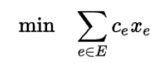

### Decision Variables 

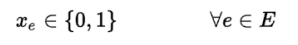

In [10]:
for e in edge_set:
    cpx.variables.add(obj=[e.dist], types=["B"], names=[e.id])

### Constraints 

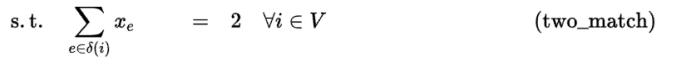
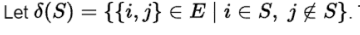

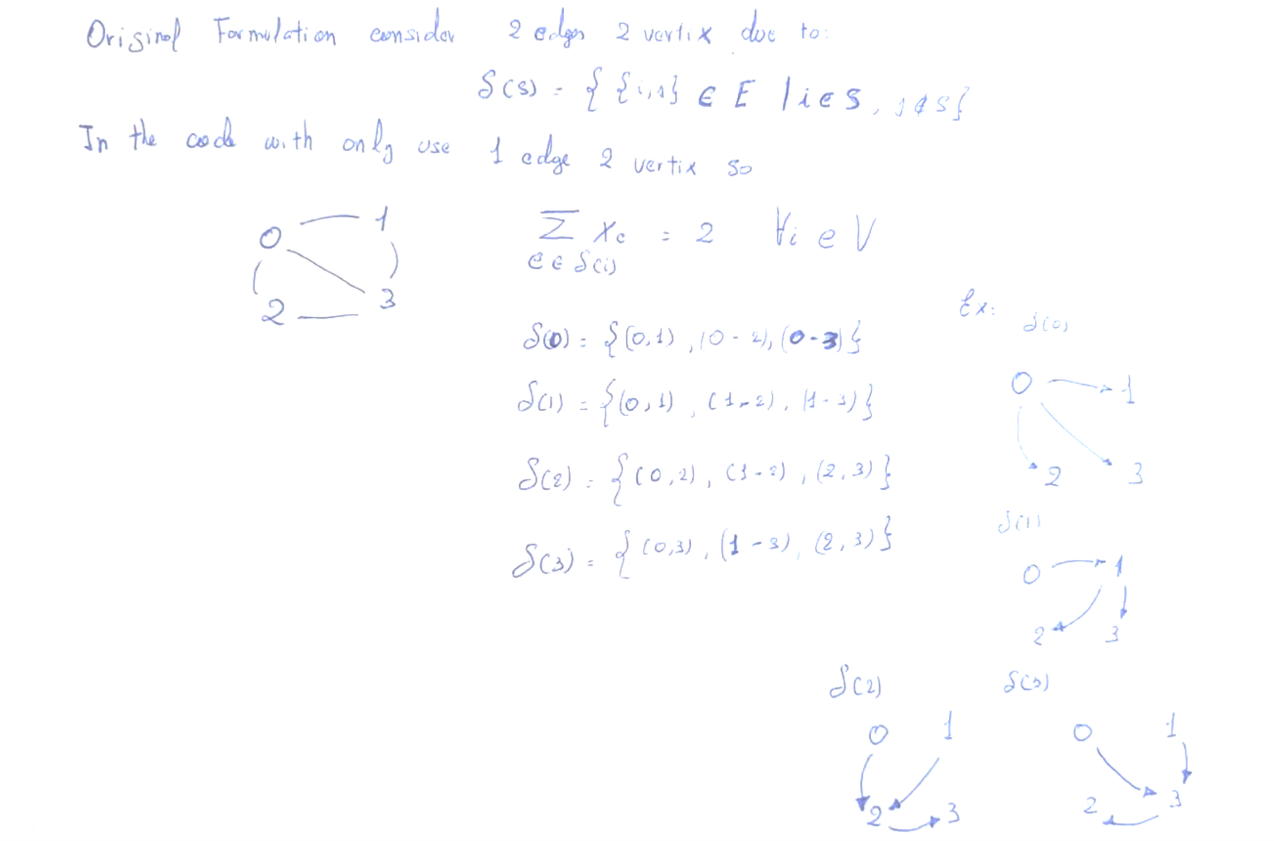

In [11]:
for i in vertex_set:
    var_1 = [e.id for e in edge_set if e.v1 is i or e.v2 is i] 
    coef_1 = [1 for e in var_1]
    cpx.linear_constraints.add(lin_expr=[[var_1, coef_1]], senses=["E"], rhs=[2])

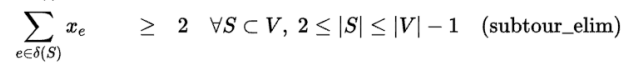

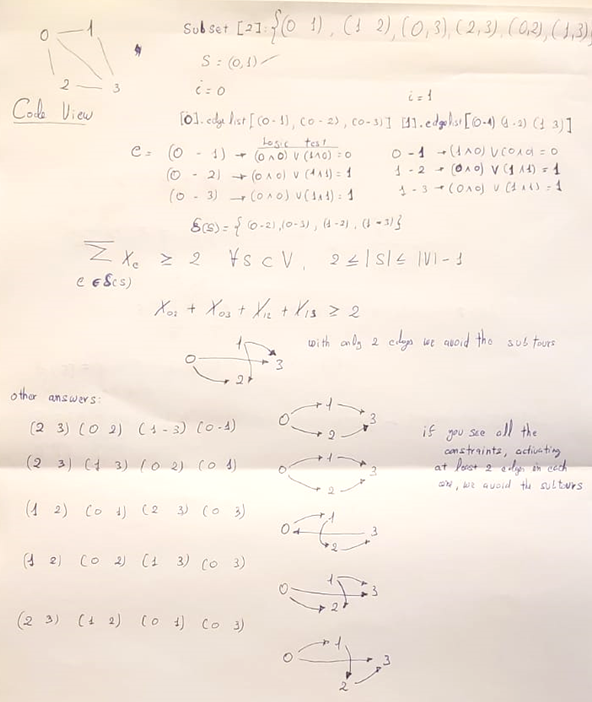

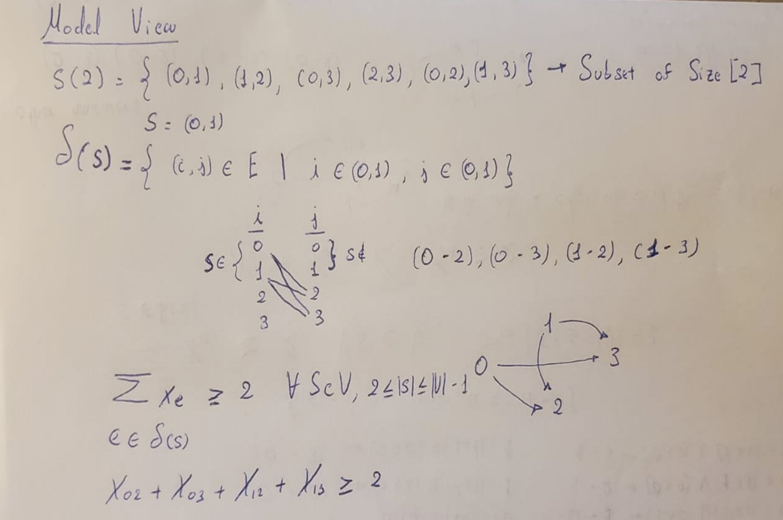

In [22]:
#for n in range(2, len(vertex_set)):
for s in subsets [2]:
    var_2 = []
    for i in s:
        for e in i.edge_list:
            if (e.v2 is not i and e.v2 not in s) or (e.v1 is not i and e.v1 not in s):
                var_2.append(e.id)
    coef_2 = [1 for e in var_2]
    cpx.linear_constraints.add(lin_expr=[[var_2, coef_2]], senses=["G"], rhs=[2])

In [23]:
cpx.solve()
print()
print("Solution status = ", cpx.solution.get_status(), ":", end=' ')
print(cpx.solution.status[cpx.solution.get_status()])
print("Solution value  = ", cpx.solution.get_objective_value())
print()

Version identifier: 22.1.0.0 | 2022-03-09 | 1a383f8ce
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 6 rows and 0 columns.
Reduced MIP has 4 rows, 6 columns, and 12 nonzeros.
Reduced MIP has 6 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (0.02 ticks)
Found incumbent of value 5043.000000 after 0.06 sec. (0.02 ticks)
Probing time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 4 rows and 6 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.01 ticks)

Root node processing (before b&c):
  Real time             =    0.06 sec. (0.03 ticks)
Parallel b&c, 8 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.06 sec. (0.03 ticks)

Solution status =  101 : MIP_optimal
Solution value  =  5000.0

